In [66]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v2.feature_column as fc
from IPython.display import clear_output

### Load dataset and make data frames



In [67]:
dftrain = pd.read_csv('train.csv') # to train and make the model
dfeval = pd.read_csv('eval.csv')  # to test the trained model
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [68]:
print(dftrain.loc[0], "\nSurvival = ", y_train.loc[0]) #checking by locating values at first indices of both data frames

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 
Survival =  0


### Exploring the data frame

In [69]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [70]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [71]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [72]:
dftrain.shape

(627, 9)

### Visualising the data

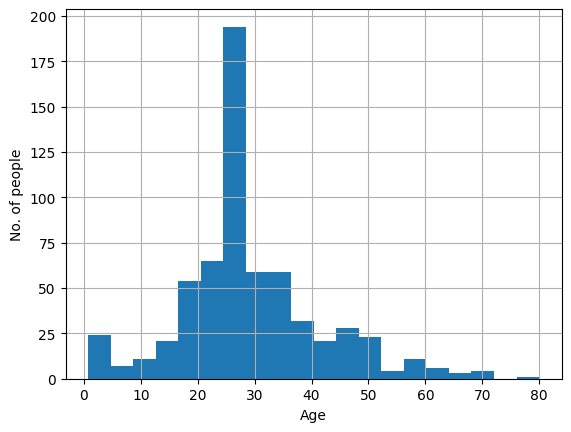

In [73]:
ax = dftrain.age.hist(bins=20) #age variations 
ax.set_xlabel("Age")
ax.set_ylabel("No. of people")
plt.show()

<Axes: ylabel='sex'>

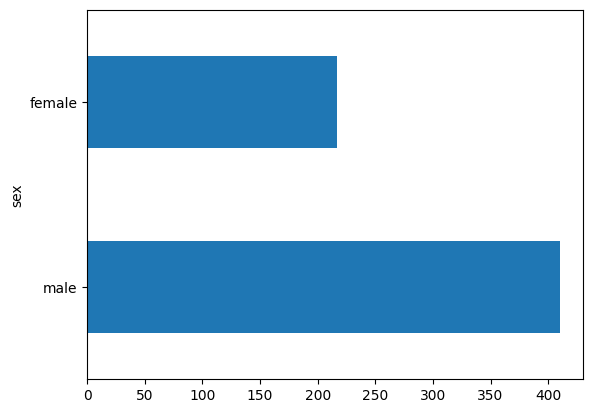

In [74]:
dftrain.sex.value_counts().plot(kind = 'barh')

<Axes: ylabel='class'>

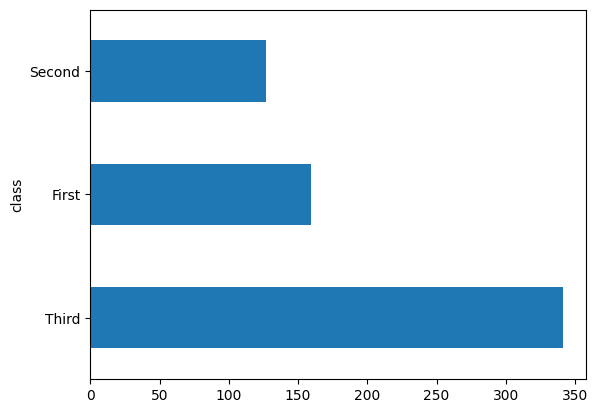

In [75]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% survived')

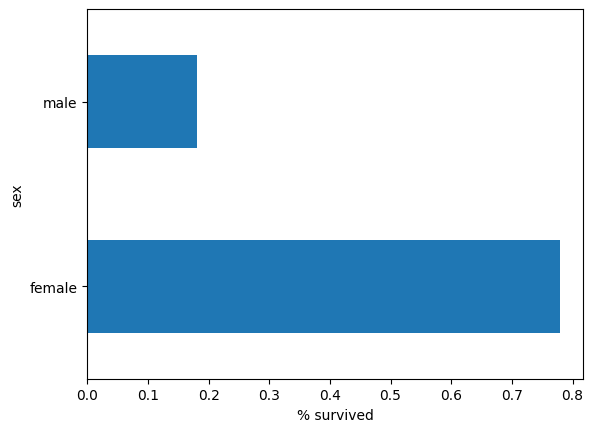

In [76]:
# looking the percentage survival according to sex - which gender survived more compared to other
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')

### Training and Testing data

In [97]:
categorical_columns = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
numeric_columns = ['age','fare']
feature_columns = []
for feature_name in categorical_columns:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# to turn a pandas dataset into a tensorflow data object
def make_input_fn(data_df, label_df, num_epochs=20, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

#training the model
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
clear_output()
print("Accuracy of prediction model = ", '{:.2f}'.format((result['accuracy'])*100), "%")

Accuracy of prediction model =  76.52 %


In [98]:
result = list(linear_est.predict(eval_input_fn))
clear_output()
# for some random person - survival chances being predicted (5th person here)
print("Chances of survival = ", "{:.2f}".format((result[5]['probabilities'][1])*100),"%")
print("Chances of not-surviving = ", "{:.2f}".format((result[5]['probabilities'][0])*100),"%")


Chances of survival =  76.93 %
Chances of not-surviving =  23.07 %
